In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [39]:
df = pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [40]:
# Linear Regression Model

# Separate features and target variable
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)

# Concatenate training and test data to ensure consistent one-hot encoding
concatenated_data = pd.concat([x_train, x_test], axis=0)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
concatenated_encoded = encoder.fit_transform(concatenated_data)

# Determine the index to split the concatenated data back into training and test sets
split_index = len(x_train)

# Split the concatenated encoded data back into training and test sets
x_train_encoded = concatenated_encoded[:split_index]
x_test_encoded = concatenated_encoded[split_index:]

# Scale numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

# Build and train linear regression model
reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_train)

# Evaluate the model using mean absolute error (MAE)
y_pred = reg_model.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(reg_model, x_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE Scores:", -cv_scores)

C:\Users\ednit\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error (MAE): 1296300278329376.8
Cross-Validation MAE Scores: [1.79476066e+17 1.75238209e+17 1.12724214e+17 2.11184803e+17
 1.90886891e+17]


In [41]:
# Get the absolute coefficients of the linear regression model
feature_importance = np.abs(reg_model.coef_)

# Get the names of the features after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=X.columns)

# Map feature names to their importance scores
feature_importance_mapping = dict(zip(encoded_feature_names, feature_importance))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Education Level_phD: 3.0086644975847066e+17
Job Title_Project Engineer: 2.3209890685244995e+17
Job Title_Director of Sales and Marketing: 2.1632647057433955e+17
Job Title_Junior Financial Advisor: 1.630915597421643e+17
Job Title_Senior Sales Representative: 1.3596234100092694e+17
Job Title_Senior Consultant: 1.2823169458802306e+17
Job Title_Senior IT Project Manager: 1.2274544823407013e+17
Job Title_Chief Technology Officer: 1.1659130019754893e+17
Job Title_Marketing Specialist: 1.1171535606903398e+17
Job Title_Junior Customer Support Specialist: 9.38087316887785e+16
Job Title_Senior Training Specialist: 8.894216819191574e+16
Job Title_Software Manager: 8.414530236569659e+16
Job Title_Supply Chain Analyst: 7.174258051288918e+16
Job Title_Software Project Manager: 6.894997807700444e+16
Job Title_Customer Success Rep: 6.345443481916535e+16
Job Title_Human Resources Director: 5.785544649138211e+16
Job Title_UX Designer: 5.709929330029755e+16
Job Title_IT Support Specialist: 5.631400620333

In [42]:
# Get the names of the original features
original_feature_names = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']

# Map feature names to their importance scores
feature_importance_mapping = dict(zip(original_feature_names, feature_importance))

# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)

# Convert feature importance dictionary to a DataFrame
feature_importance_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

# Print the DataFrame
print(feature_importance_df)

               Feature   Importance
0      Education Level  2288.347288
1  Years of Experience  1930.693108
2            Job Title  1903.368067
3               Gender  1705.833106
4                  Age   520.183674


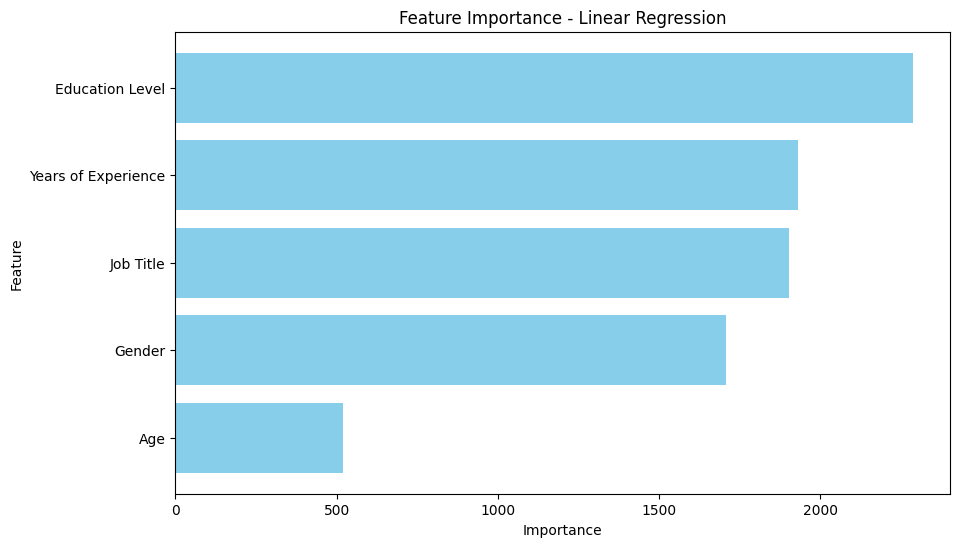

In [43]:
# Convert feature importance dictionary to a DataFrame
feature_importance_df = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

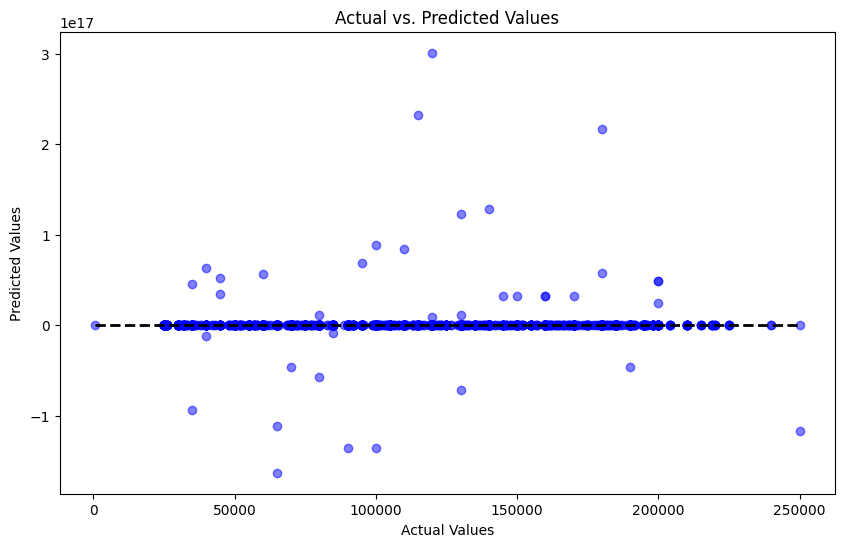

In [49]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line representing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

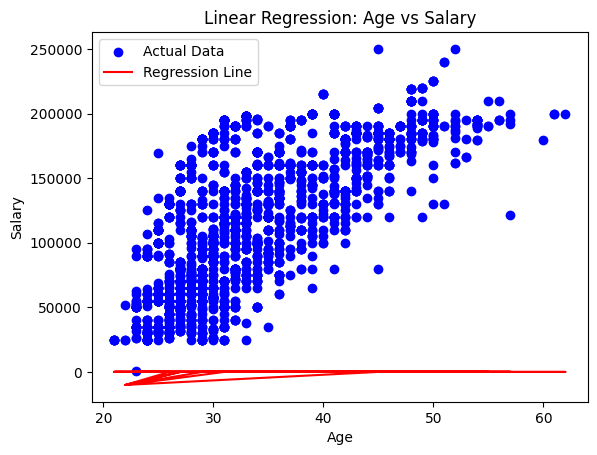

In [46]:
# Extract coefficients
coefficients = reg_model.coef_

# Find the index corresponding to the 'Age' feature
age_index = concatenated_data.columns.get_loc('Age')

# Get the coefficient corresponding to 'Age'
age_coefficient = coefficients[age_index]

# Plotting the regression line
plt.scatter(x_test['Age'], y_test, color='blue', label='Actual Data')
plt.plot(x_test['Age'], age_coefficient * x_test_scaled[:, age_index], color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Linear Regression: Age vs Salary')
plt.legend()
plt.show()

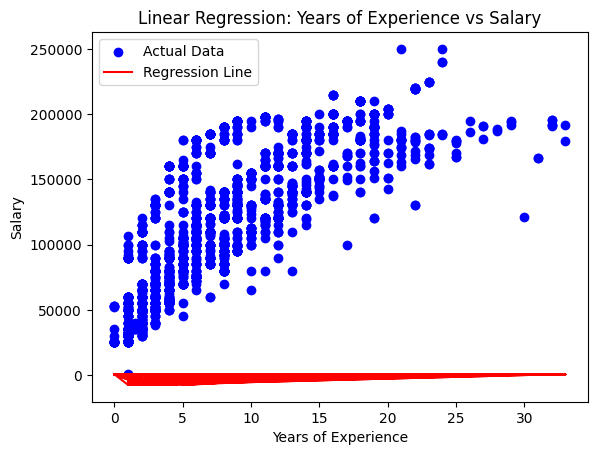

In [47]:
# Find the index corresponding to the 'Years of Experience' feature
experience_index = concatenated_data.columns.get_loc('Years of Experience')

# Get the coefficient corresponding to 'Years of Experience'
experience_coefficient = coefficients[experience_index]

# Plotting the regression line
plt.scatter(x_test['Years of Experience'], y_test, color='blue', label='Actual Data')
plt.plot(x_test['Years of Experience'], experience_coefficient * x_test_scaled[:, experience_index], color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.legend()
plt.show()